In [12]:
import pandas as pd 

test_df = pd.read_csv('data/ETTh1/test.csv')
input_field = ['HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'LULL']
output_field = ['OT']
for col in output_field:
    test_df[col+'_pred'] = pd.Series()

In [10]:
test_df.head()

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT,OT_pred
0,2018-03-09 23:00:00,12.592,3.885,9.879,2.665,2.467,0.640,4.784,NaN
1,2018-03-10 00:00:00,12.458,3.751,10.270,2.594,2.102,0.457,4.854,NaN
2,2018-03-10 01:00:00,12.123,4.488,10.554,3.518,1.858,0.426,5.065,NaN
3,2018-03-10 02:00:00,11.721,3.081,9.879,2.168,1.858,0.487,4.643,NaN
4,2018-03-10 03:00:00,12.391,3.751,10.518,2.630,1.919,0.579,4.784,NaN


In [20]:
import torch
import pandas as pd
from src.utils import load_checkpoint
from src.scaler import Scaler
from src.dataset import TimeSeriesDataset
from src.forecast_models import LSTMForecaster

input_field = ['HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'LULL', 'OT']
output_field = ['OT', 'LULL']
timeseries_field = list(set(input_field + output_field))
datasetPath = 'data/ETTh1'

if torch.cuda.is_available():
    device =  torch.device('cuda')
else:
    device =  torch.device('cpu')

train_df = pd.read_csv(f'{datasetPath}/train.csv')
test_df = pd.read_csv(f'{datasetPath}/test.csv')
val_df = pd.read_csv(f'{datasetPath}/val.csv')
scaler = Scaler(train_df[timeseries_field], 'minmax')

train_dataset = TimeSeriesDataset(train_df, input_field, output_field, t= 24, h =12, scaler=scaler)
test_dataset = TimeSeriesDataset(test_df, input_field, output_field, t= 24, h =12, scaler=scaler)
val_dataset = TimeSeriesDataset(val_df, input_field, output_field, t= 24, h =12, scaler=scaler)



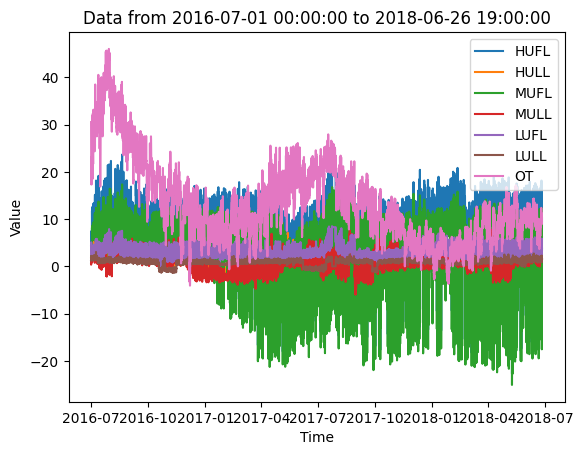

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_csv_by_time(csv_path, start_time, end_time):
    # Load CSV file into a pandas dataframe
    df = pd.read_csv(csv_path, parse_dates=['date'], index_col=['date'])
    
    # Select rows within the specified time range
    df = df.loc[start_time:end_time]
    
    # Generate a line plot for each column in the dataframe
    for col in df.columns:
        plt.plot(df.index, df[col], label=col)
    
    # Set plot title and axis labels
    plt.title(f"Data from {start_time} to {end_time}")
    plt.xlabel("Time")
    plt.ylabel("Value")
    
    # Display legend and show plot
    plt.legend()
    plt.show()


plot_csv_by_time('data/ETTh1/ETTh1.csv', '2016-07-01 00:00:00', '2018-06-26 19:00:00')